<H2>Predict the price of a pumpkin for sale during a given month</H2>

In [9]:
import pandas as pd

pumpkins = pd.read_csv('./us-pumpkins.csv')
# filter csv to only get bushel data
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]
pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
70,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,9/24/16,15.0,15.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
71,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,9/24/16,18.0,18.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
72,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/1/16,18.0,18.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
73,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/1/16,17.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
74,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/8/16,15.0,15.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [10]:
#check for missing dates
pumpkins.isnull().sum()

City Name            0
Type               406
Package              0
Variety              0
Sub Variety        167
Grade              415
Date                 0
Low Price            0
High Price           0
Mostly Low          24
Mostly High         24
Origin               0
Origin District    396
Item Size          114
Color              145
Environment        415
Unit of Sale       404
Quality            415
Condition          415
Appearance         415
Storage            415
Crop               415
Repack               0
Trans Mode         415
Unnamed: 24        415
Unnamed: 25        391
dtype: int64

In [11]:
# drops some columns, keep what is needed
new_col = ['Package', 'Month', 'Low Price', 'High Price', 'Date']
pumpkins = pumpkins.drop([col for col in pumpkins.columns if col not in new_col], axis=1)
pumpkins.head()

,Package,Date,Low Price,High Price
70,1 1/9 bushel cartons,9/24/16,15.0,15.0
71,1 1/9 bushel cartons,9/24/16,18.0,18.0
72,1 1/9 bushel cartons,10/1/16,18.0,18.0
73,1 1/9 bushel cartons,10/1/16,17.0,17.0
74,1 1/9 bushel cartons,10/8/16,15.0,15.0


In [12]:
# Find average of pumpkin price in each month
# By taking average of Low Price and High Price of each month

price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2
month = pd.DatetimeIndex(pumpkins['Date']).month
new_pumpkins = pd.DataFrame({'Month': month, 'Package': pumpkins['Package'], 'Low Price': pumpkins['Low Price'],'High Price': pumpkins['High Price'], 'Price': price})
new_pumpkins.head()

,Month,Package,Low Price,High Price,Price
70,9,1 1/9 bushel cartons,15.0,15.0,15.0
71,9,1 1/9 bushel cartons,18.0,18.0,18.0
72,10,1 1/9 bushel cartons,18.0,18.0,18.0
73,10,1 1/9 bushel cartons,17.0,17.0,17.0
74,10,1 1/9 bushel cartons,15.0,15.0,15.0


In [13]:
# normalize pricing to bushel
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/(1 + 1/9)
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price/(1/2)

<H3>Data Visualization, Not a useful one... </H3>

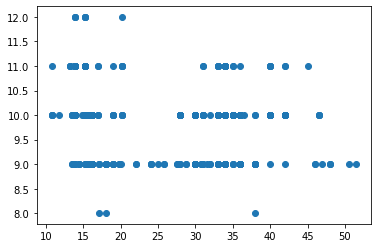

In [14]:
import matplotlib.pyplot as plt

price = new_pumpkins.Price
month = new_pumpkins.Month
plt.scatter(price, month)
plt.show()

Text(0, 0.5, 'Pumpkin Price')

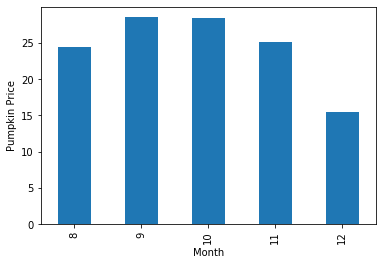

In [15]:
# Creating group bar chart

new_pumpkins.groupby(['Month'])['Price'].mean().plot(kind='bar')
plt.ylabel('Pumpkin Price')

The highest price is between Sep and Oct...